并行化思维

In [1]:
normal_list = range(10000)
%timeit [i**2 for i in normal_list]

100 loops, best of 3: 2.82 ms per loop


使用numpy的效率

In [2]:
import numpy as np
np_list = np.arange(10000)
%timeit np_list**2

100000 loops, best of 3: 6.54 µs per loop


In [3]:
np.zeros(100)

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [4]:
np.ones((3,2))

array([[ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.]])

In [5]:
np.empty((2,3,3))

array([[[ -2.31584178e+077,  -2.31584178e+077,   4.94065646e-323],
        [  0.00000000e+000,   0.00000000e+000,   1.15998412e-028],
        [  2.44171989e+232,   8.00801729e+159,   8.16124052e-153]],

       [[  7.19081947e+140,   6.01347002e-154,   1.05089651e-153],
        [  1.81148490e-152,   8.09244594e-153,   7.19081947e+140],
        [  3.77780862e+180,   1.15998412e-028,   6.48224638e+170]]])

In [6]:
np.ones_like(np_list)

array([1, 1, 1, ..., 1, 1, 1])

In [7]:
np.eye(3)

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [8]:
data = [[1,2,3,4],[5,6,7,8]]
arr_np = np.array(data)
arr_np

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [9]:
np.linspace(0, 1,10)

array([ 0.        ,  0.11111111,  0.22222222,  0.33333333,  0.44444444,
        0.55555556,  0.66666667,  0.77777778,  0.88888889,  1.        ])

索引选取和切片选择


In [5]:
import numpy as np
stock_cnt = 200
view_days = 504
stock_day_change = np.random.standard_normal((stock_cnt, view_days))
print(stock_day_change.shape)

(200, 504)


In [10]:
print(stock_day_change[0:2, 0:5])
print(stock_day_change[-2:, -5:])

[[-0.5760474   1.42936729 -1.36910911 -0.18281391  1.26674615]
 [ 1.12689725 -0.47267943 -0.49433508  1.20792638 -0.45582556]]
[[-0.5760474   1.42936729 -1.36910911 -0.18281391  1.26674615]
 [ 1.12689725 -0.47267943 -0.49433508  1.20792638 -0.45582556]]


In [11]:
tmp = stock_day_change[0:2, 0:5].copy()
stock_day_change[0:2, 0:5] = stock_day_change[-2:, -5:]
stock_day_change[-2:, -5:] = tmp
stock_day_change[0:2,0:5], stock_day_change[-2:, -5:]

(array([[-0.5760474 ,  1.42936729, -1.36910911, -0.18281391,  1.26674615],
        [ 1.12689725, -0.47267943, -0.49433508,  1.20792638, -0.45582556]]),
 array([[-0.5760474 ,  1.42936729, -1.36910911, -0.18281391,  1.26674615],
        [ 1.12689725, -0.47267943, -0.49433508,  1.20792638, -0.45582556]]))

In [12]:
stock_day_change[0:2, 0:5].astype(int)

array([[ 0,  1, -1,  0,  1],
       [ 1,  0,  0,  1,  0]])

In [13]:
tmp_test = stock_day_change[0:2, 0:5].copy()
tmp_test = np.nan_to_num(tmp_test)
tmp_test

array([[-0.5760474 ,  1.42936729, -1.36910911, -0.18281391,  1.26674615],
       [ 1.12689725, -0.47267943, -0.49433508,  1.20792638, -0.45582556]])

In [15]:
mask = stock_day_change[0:2, 0:5] > 0.5
print(mask)

[[False  True False False  True]
 [ True False False  True False]]


In [17]:
tmp_test = stock_day_change[0:2, 0:5].copy()
tmp_test[mask]

array([ 1.42936729,  1.26674615,  1.12689725,  1.20792638])

In [18]:
tmp_test = stock_day_change[-2:, -5:]
print(tmp_test)
tmp_test[(tmp_test > 1) | (tmp_test < -1)]

[[-0.5760474   1.42936729 -1.36910911 -0.18281391  1.26674615]
 [ 1.12689725 -0.47267943 -0.49433508  1.20792638 -0.45582556]]


array([ 1.42936729, -1.36910911,  1.26674615,  1.12689725,  1.20792638])

In [19]:
np.all(stock_day_change[0:2, 0:5] > 0)

False

In [20]:
np.any(stock_day_change[0:2, 0:5] > 0)

True

In [21]:
np.maximum(stock_day_change[0:2, 0:5], stock_day_change[-2:, -5:])

array([[-0.5760474 ,  1.42936729, -1.36910911, -0.18281391,  1.26674615],
       [ 1.12689725, -0.47267943, -0.49433508,  1.20792638, -0.45582556]])

In [23]:
change_int = stock_day_change[0:2, 0:5].astype(int)
print(change_int)
np.unique(change_int)

[[ 0  1 -1  0  1]
 [ 1  0  0  1  0]]


array([-1,  0,  1])

In [24]:
np.diff(stock_day_change[0:2, 0:5])

array([[ 2.00541469, -2.7984764 ,  1.1862952 ,  1.44956006],
       [-1.59957668, -0.02165566,  1.70226146, -1.66375194]])

In [25]:
print(stock_day_change[0][1] - stock_day_change[0][0])

2.00541469228


np.where()

In [26]:
tmp_test = stock_day_change[-2:, -5:]
print(np.where(tmp_test > 0.5 , 1, 0))

[[0 1 0 0 1]
 [1 0 0 1 0]]


In [28]:
np.save('./stock_day_change', stock_day_change)

In [29]:
stock_day_change = np.load('./stock_day_change.npy')
print(stock_day_change.shape)

(200, 504)


In [30]:
stock_day_change_four = stock_day_change[:4, :4]
stock_day_change_four

array([[-0.5760474 ,  1.42936729, -1.36910911, -0.18281391],
       [ 1.12689725, -0.47267943, -0.49433508,  1.20792638],
       [-1.79372534, -0.01994357,  0.31503386, -0.67026669],
       [ 1.96373041, -0.4502852 , -1.10907784,  1.23803778]])

In [33]:
print('最大涨幅{}'.format(np.max(stock_day_change_four, axis = 1)))
print('最大跌幅{}'.format(np.min(stock_day_change_four, axis = 1)))
print('振幅幅度{}'.format(np.std(stock_day_change_four, axis = 1)))
print('平均涨跌{}'.format(np.mean(stock_day_change_four, axis = 1)))
print('最大涨跌幅股票{}'.format(np.argmax(stock_day_change_four, axis = 0)))

最大涨幅[ 1.42936729  1.20792638  0.31503386  1.96373041]
最大跌幅[-1.36910911 -0.49433508 -1.79372534 -1.10907784]
振幅幅度[ 1.0199008   0.825992    0.80472331  1.23969869]
平均涨跌[-0.17465078  0.34195228 -0.54222544  0.41060128]
最大涨跌幅股票[3 0 2 3]


## 3.2.2 基础统计概念


In [42]:
a_invertor = np.random.normal(loc=100, scale=50, size=(100, 1))
b_invertor = np.random.normal(loc=100, scale=20, size=(100, 1))
print('a交易者期望{0:.2f}元,标准差{1:.2f}, 方差{2:.2f}'.format(a_invertor.mean(), a_invertor.std(), a_invertor.var()))
print('b交易者期望{0:.2f}元,标准差{1:.2f}, 方差{2:.2f}'.format(b_invertor.mean(), b_invertor.std(), b_invertor.var()))

a交易者期望100.72元,标准差52.65, 方差2771.86
b交易者期望98.73元,标准差20.13, 方差405.05


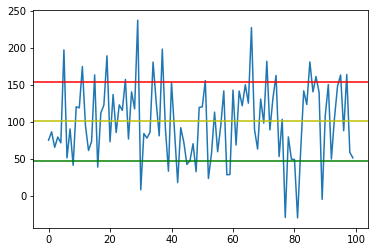

In [43]:
import matplotlib.pyplot as plt
a_mean = a_invertor.mean()
a_std = a_invertor.std()
plt.plot(a_invertor)
plt.axhline(a_mean + a_std, color='r')
plt.axhline(a_mean, color='y')
plt.axhline(a_mean - a_std, color='g')
plt.show()

b交易者

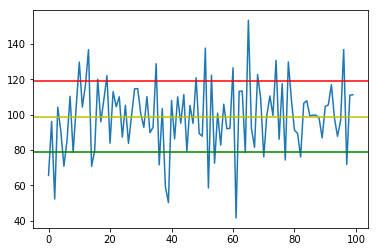

In [44]:
# import matplotlib.pyplot as plt
b_mean = b_invertor.mean()
b_std = b_invertor.std()
plt.plot(b_invertor)
plt.axhline(b_mean + b_std, color='r')
plt.axhline(b_mean, color='y')
plt.axhline(b_mean - b_std, color='g')
plt.show()

# 3.3 正态分布

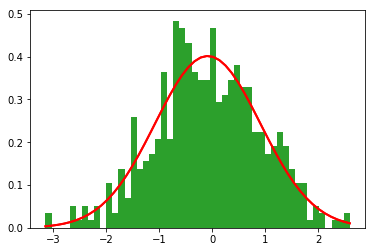

In [47]:
import scipy.stats as scs
stock_mean = stock_day_change[0].mean()
stock_std = stock_day_change[0].std()
#绘制直方图
plt.hist(stock_day_change[0], bins=50, normed = True)
fit_linspace = np.linspace(stock_day_change[0].min(), stock_day_change[0].max())
pdf = scs.norm(stock_mean, stock_std).pdf(fit_linspace)
plt.plot(fit_linspace, pdf, lw=2, c='r')
plt.show()

## 3.3.2 正态分布买入 策略

In [50]:
keep_days = 50
stock_day_change_test = stock_day_change[:stock_cnt, 0:view_days - keep_days]
print(np.sort(np.sum(stock_day_change_test, axis = 1))[:3])
stock_lower_array = np.argsort(np.sum(stock_day_change_test, axis=1))[:3]
print(stock_lower_array)

[-61.28642394 -60.43079944 -57.6569856 ]
[77 63 49]


In [55]:
def show_buy_lower(stock_ind):
    _,axs = plt.subplots(nrows=1, ncols=2, figsize=(16,5))
    print('axs[0] {}'.format(axs[0]))
    axs[0].plot(np.arange(0,view_days - keep_days), stock_day_change_test[stock_ind].cumsum())
    cs_buy = stock_day_change_test[stock_ind][view_days - keep_days:view_days].cumsum()
    axs[1].plot(np.arange(view_days - keep_days, view_days), cs_buy)
    return cs_buy[-1]

profit = 0
for stock_ind in stock_lower_array:
    profit += show_buy_lower(stock_ind)

print('买入第 {} 只股票,从第454个交易日开始持有盈亏:{:.2f}%'.format(stock_lower_array, profit))

axs[0] Axes(0.125,0.125;0.352273x0.755)


ValueError: x and y must have same first dimension, but have shapes (50,) and (0,)

# 3.4 伯努力分布

In [58]:
gamblers = 1

def casino(win_rate, win_once=1, loss_once=1, commission=0.01):
    my_money = 1000000
    plat_cnt = 10000000
    commission = commission
    for _ in np.arange(0, plat_cnt):
        w = np.random.binomial(1, win_rate)
        if w:
            my_money += win_once
        else:
            my_money -= loss_once
        my_money -= commission
        if my_money < 0:
            break

    return my_money


# heaven_moneys = [casino(0.5, commission=0) for _ in np.arange(0, gamblers)]
# print(heaven_moneys)


cheat_moneys = [casino(0.4, commission=0) for _ in np.arange(0, gamblers)]
print(cheat_moneys)

# commission_moneys = [casino(0.5, commission=0.01) for _ in np.arange(0, gamblers)]
# print(commission_moneys)

[-1]
